In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [ ]:
import cv2 as cv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
path='drive/My Drive/Forest Fire Dataset/Training/'


In [ ]:
batch_siz=32
image_height=128
img_width=128


In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
path,
validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_height,img_width),
    batch_size=batch_siz

)

Found 6484 files belonging to 2 classes.
Using 5188 files for training.


In [ ]:
print(train_ds)
print(train_ds.class_names)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
['fire', 'nofire']


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
path,
validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height,img_width),
    batch_size=batch_siz
)

Found 6484 files belonging to 2 classes.
Using 1296 files for validation.


In [ ]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE
)

In [ ]:
num_classes=2
model=tf.keras.models.Sequential([

                                  tf.keras.layers.InputLayer(input_shape=(image_height,img_width,3)),
                                  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),

                                  tf.keras.layers.Conv2D(16,3 ,activation='relu'),
                                  tf.keras.layers.MaxPooling2D(),

                                  tf.keras.layers.Conv2D(32,3,activation='relu'),
                                  tf.keras.layers.MaxPooling2D(),

                                  tf.keras.layers.Conv2D(64,3,activation='relu'),
                                  tf.keras.layers.MaxPooling2D(),


                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(num_classes,activation='softmax')

                                 ])

In [ ]:
model.compile(optimizer='adam',
            #  loss='sparse_categorical_crossentropy',
            loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

early_stop_back=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0.001,
                                               patience=5)

history=model.fit(train_ds,validation_data=val_ds,
                 epochs=30
                 )



Epoch 1/30
163/163 [==============================] - 4s 12ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.1766 - val_accuracy: 0.9730
Epoch 2/30
163/163 [==============================] - 2s 11ms/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 0.1807 - val_accuracy: 0.9784
Epoch 3/30
163/163 [==============================] - 2s 12ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.1214 - val_accuracy: 0.9776
Epoch 4/30
163/163 [==============================] - 2s 12ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.1207 - val_accuracy: 0.9776
Epoch 5/30
163/163 [==============================] - 2s 11ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.2044 - val_accuracy: 0.9715
Epoch 6/30
163/163 [==============================] - 2s 11ms/step - loss: 0.0078 - accuracy: 0.9983 - val_loss: 0.6192 - val_accuracy: 0.9514
Epoch 7/30
163/163 [==============================] - 2s 11ms/step - loss: 0.0332 - accuracy: 0.9913 - val_loss: 0.1268 - val_accuracy: 0.9761

In [ ]:
#WEM

In [ ]:
loss,acc=model.evaluate(val_ds,batch_size=batch_siz)
print("Accuracy",acc)
print("loss",loss)

41/41 [==============================] - 0s 6ms/step - loss: 0.1522 - accuracy: 0.9769
Accuracy 0.9768518805503845
loss 0.15215598046779633


In [ ]:
model.save("drive/My Drive/fire_model_final_forweb.h5")


In [ ]:
def prediction(img):
    class_names = ['fire', 'not fire']
    my_image = load_img(img, target_size=(image_height, img_width))
    my_image = img_to_array(my_image)
    my_image = np.expand_dims(my_image, 0)
    out = np.round(model.predict(my_image)[0], 2)
    fig = plt.figure(figsize=(7, 4))
    plt.barh(class_names, out, color='lightgray',edgecolor='red', linewidth=1,height=0.5)
    for index, value in enumerate(out):
        plt.text(value/2 + 0.1, index, f"{100*value:.2f}%", fontweight='bold')
        plt.xticks([])
        plt.yticks([0, 1], labels=class_names, fontweight='bold',fontsize=14)
        fig.savefig('pred_img.png', bbox_inches='tight')
    if out[0]>out[1]:
      print("Fire detected")
    elif out[0]<out[1]:
      print("No fire detected")
    return plt.show(),my_image


1/1 [==============================] - 0s 19ms/step
Fire detected


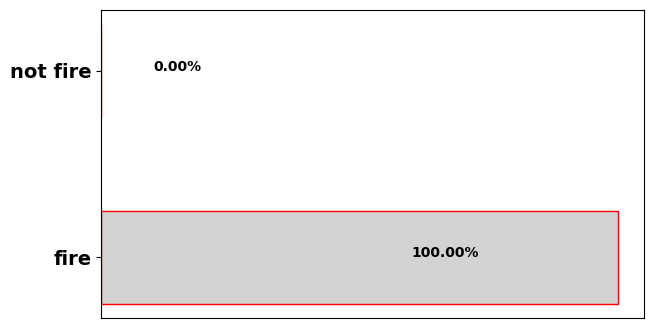

(None,
 array([[[[145.,  34.,  27.],
          [147.,  34.,  28.],
          [148.,  35.,  27.],
          ...,
          [105.,  15.,  27.],
          [109.,  19.,  29.],
          [107.,  17.,  27.]],
 
         [[140.,  31.,  26.],
          [143.,  34.,  29.],
          [146.,  35.,  28.],
          ...,
          [108.,  18.,  28.],
          [103.,  15.,  27.],
          [104.,  18.,  31.]],
 
         [[138.,  30.,  27.],
          [141.,  33.,  30.],
          [143.,  34.,  29.],
          ...,
          [111.,  19.,  30.],
          [102.,  16.,  29.],
          [102.,  18.,  33.]],
 
         ...,
 
         [[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         [[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0

In [ ]:
prediction("/content/98.jpg")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

tsend=cv2.imread("/content/98.jpg")
blur=cv2.GaussianBlur(tsend,(15,15),0)
hsv=cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)
lower=[18,50,50]
upper=[35,255,255]
lower1=np.array(lower,dtype='uint8')
upper1=np.array(upper,dtype='uint8')
mask=cv2.inRange(hsv,lower1,upper1)

output=cv2.bitwise_and(tsend,hsv,mask=mask)
mask_ = Image.fromarray(output)
bbox=mask_.getbbox()
plt.imshow(tsend)

print(bbox)


NameError: ignored

In [ ]:
  plt.imshow(blur)

In [ ]:
th=127
max_v=255
ret, o1 = cv2.threshold(output,th,max_v,cv2.THRESH_BINARY)
